In [1772]:
import numpy as np
from scipy.linalg import sqrtm
from scipy import linalg 

In [1773]:
size = 20
A = np.zeros([size,size])
for i in range(100):
    a = np.random.normal(0,1,(size,1))
    A +=np.matmul(a,a.T)
A = A/100

In [1774]:
iter  = 1000
eps = 1e-8

x = np.ones([size,1])
stepsize = 3e0
A_0 = np.diag(np.ones(size)*eps)

trac = []
x_tmp = []

y = np.ones([size,1])
B_0 = np.diag(np.ones(size)*eps)

trac1 = []
x_tmp1 = []

In [1775]:
def f(x):
    return np.matmul(x.T,np.matmul(A,x))

In [1776]:
for i in range(iter):
    grad_tmp = np.matmul(A,x)
    A_0 = A_0 + np.matmul(grad_tmp,grad_tmp.T)
    sqr = sqrtm(A_0)
    x = x-stepsize*np.matmul(linalg.inv(sqr),grad_tmp)
    x_tmp.append(f(x).item())
    trac.append(np.trace(sqr))

    grad_tmp1 = np.matmul(A,y)
    B_0 = B_0 + np.diag(np.diag(np.matmul(grad_tmp1,grad_tmp1.T)))
    sqr1 = sqrtm(B_0)
    y = y-stepsize*np.matmul(linalg.inv(sqr1),grad_tmp1)
    x_tmp1.append(f(y).item())
    trac1.append(np.trace(sqr1))

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


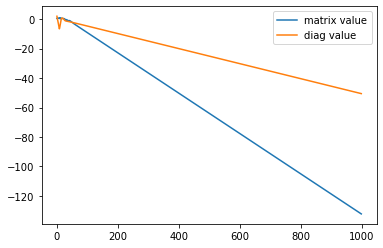

In [1777]:
import matplotlib.pyplot as plt

plt.plot(np.log10(x_tmp),label='matrix value')
plt.plot(np.log10(x_tmp1),label='diag value')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


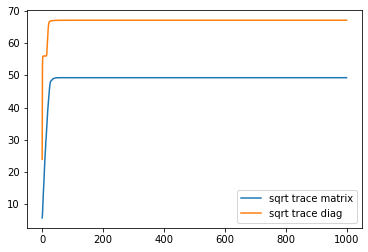

In [1778]:
import matplotlib.pyplot as plt

plt.plot(trac,label='sqrt trace matrix')
plt.plot(trac1,label='sqrt trace diag')
plt.legend()
plt.show()